# IMAGE TAGGING 

The purpose of this notebook is to discover which images from the dataset are labelled and how are the label. 

With this information the images are going to be distributed in training and validation sets (two different directories), both containing one directory per label (D - Diabetes, G - Glaucoma...) with the images inside.

Also, some samples images are taken and plotted from each to inspect them visually and see how they look like.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import os
import shutil
import random

from sklearn.model_selection import train_test_split

import imageio
import matplotlib.pyplot as plt

The first step is to read and explore the data to manage how is labelled.

In [2]:
# read the csv that contains all the information from each image 
df = pd.read_csv("full_df.csv")

In [5]:
# showing first 5 rows of the dataframe
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [6]:
# showing last 5 rows of the dataframe
df.tail(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


It can be seen that the dataset contains duplicates patients with data from their left and right eyes.
First half of rows from the dataset contains right eye image data and last half of rows those from the left eye.

Also, it can be noticed that columns 'filename' and 'target' are the important ones since they contains the image filepath and the label (vector of 1 and 0s). The target is always a vector with only one element activated (mark as 1).

In [43]:
# confirm that each patient appears two times (one per eye)
df[df['Left-Fundus'] == '0_left.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg


In [7]:
# check if there are the same amount of images for left and right eyes
print("Number of labelled images for left eye: " + str(len(df[df['filename'].str.contains('left')])))
print("Number of labelled images for right eye: " + str(len(df[df['filename'].str.contains('right')])))

Number of labelled images for left eye: 3198
Number of labelled images for right eye: 3194


### IMAGE TAGGING - ORGANIZING THE IMAGES IN DIRECTORIES BY LABEL

In [72]:
# select from original dataframe just filenames and labels columns
df_file_target = df[['filename', 'target']]

size = len(df_file_target)

# all the images filepaths in the dataset read from the main directory and read from the dataframe
filenames = os.listdir("./preprocessed_images")
ls_df_files = df_file_target['filename'].to_list()

# check if there are images for all the labelled data in the dataframe by checking which rows are not in the image directory
# if this return 0 means that there are images for all the dataset rows
print(str(len([ls_df_files[i] for i in ls_df_files if i not in filenames])))

# print also the size of the dataset
print("\nTotal images labelled: " + str(size))

0

Total images labelled: 6392


First, let's make a quick exploratory analysis of the labeled images to see the number of images from each category and the percentage from the total that they represent.

In [70]:
df_distribution = df_file_target.groupby('target').count().sort_values('filename', ascending=False)
df_distribution = df_distribution.reset_index()
df_distribution['target'] = ['Normal (N)', 'Diabetes (D)', 'Other diseases/abnormalities (O)', 'Cataract (C)', 'Glaucoma (G)', 
                             'Age related Macular Degeneration (A)', 'Pathological Myopia (M)', 'Hypertension (H)']
df_distribution.rename(columns={'target':'Name of the disease', 'filename':'Number of images'}, inplace=True)

df_distribution['Percentage'] = round((df_distribution['Number of images'] / size) * 100, 2)

df_distribution

,Name of the disease,Number of images,Percentage
0,Normal (N),2873,44.95
1,Diabetes (D),1608,25.16
2,Other diseases/abnormalities (O),708,11.08
3,Cataract (C),293,4.58
4,Glaucoma (G),284,4.44
5,Age related Macular Degeneration (A),266,4.16
6,Pathological Myopia (M),232,3.63
7,Hypertension (H),128,2.00


Next piece of code move the images to directories according to their label. 
First, train and test split is done and then directories for each label are created.

Here is a representation of how the directories will look like:
<pre>
labeled-images/
├── train/ 
│   ├── A/
│   │   ├── 43_left.jpg
│   │   ├── (...)
│   ├── C/
│   └── (...)
├── test/
    ├── A/
    │   ├── (...)
    ├── C/
    └── (...)
</pre>

In [39]:
# dictionary with category names and target vector
categories = {
    "N": "[1, 0, 0, 0, 0, 0, 0, 0]",
    "D": "[0, 1, 0, 0, 0, 0, 0, 0]",
    "G": "[0, 0, 1, 0, 0, 0, 0, 0]",
    "C": "[0, 0, 0, 1, 0, 0, 0, 0]",
    "A": "[0, 0, 0, 0, 1, 0, 0, 0]",
    "H": "[0, 0, 0, 0, 0, 1, 0, 0]",
    "M": "[0, 0, 0, 0, 0, 0, 1, 0]",
    "O": "[0, 0, 0, 0, 0, 0, 0, 1]",
}

# create main directory if not exists
if not os.path.exists('./labeled-images'): os.mkdir('./labeled-images') 

# create train and test directories under main directory
if not os.path.exists('./labeled-images/train/'): os.mkdir('./labeled-images/train/') 
if not os.path.exists('./labeled-images/test/'): os.mkdir('./labeled-images/test/')

# split the dataframe in train(90%) and test(10%), applying shuffle and mantaining the proportion of the classes
train_df, test_df = train_test_split(df_file_target, test_size=0.1, random_state=432, shuffle=True, stratify=df['target'])

# This function given a directory path and a dataframe (train or test) creates one directory per label and move the images inside 
def make_labels_directories(parent_path, df):
    # initialize list that will save sizes from each directory and from dataframe filter by label 
    ls_len_df = []
    ls_len_directory = []
    # iterate over the dictionary of categories
    for c in categories:
        # create directory for the category
        path = parent_path + c
        if not os.path.exists(path): os.mkdir(path) 
        df_aux = df[df['target'] == categories[c]]
        
        # move the file from the main directory
        path_src = "./preprocessed_images/"
        path_dst = path + '/'
        for file in df_aux['filename']:
            shutil.copyfile(path_src + file, path_dst + file)

        ls_len_df.append(len(df_aux))
        ls_len_directory.append(len(os.listdir(path)))
    
    # print both lists to check that the copy of the files was made propertly
    print("List of dataframe lenghts per category: " + str(ls_len_df))
    print("List of directories lenghts per category: " + str(ls_len_df))

In [40]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating train directory...")
make_labels_directories('./labeled-images/train/', train_df)

Creating train directory...
List of dataframe lenghts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]
List of directories lenghts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]


In [41]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating test directory...")
make_labels_directories('./labeled-images/test/', test_df)

Creating test directory...
List of dataframe lenghts per category: [288, 161, 28, 29, 27, 13, 23, 71]
List of directories lenghts per category: [288, 161, 28, 29, 27, 13, 23, 71]


## PLOTTING SAMPLE IMAGES FROM EACH CATEGORY

In [2]:
# Function that plots 9 images randomly taken from the each category directory
# the function takes as argument full category name (cat_name) and the label name (cat_label) 
# set path to read from train directory
path = './labeled-images/train/'
def sample_plotting(cat_name, cat_label):
    images_filenames = os.listdir(path+cat_label)
    # randomly select a sample of 9 images from the directory
    sample = random.sample(images_filenames, 9)
    cat_path = path + cat_label + '/'
    print("Sample of " + cat_name + " (" + str(cat_label) + ") images:")
    f, ax = plt.subplots(3,3, figsize=(8,8))
    for i in range(len(sample)):
        path_image = cat_path + sample[i]
        img = imageio.imread(path_image)
        ax[i//3, i%3].imshow(img)
        ax[i//3, i%3].axis('off')
    plt.show()

Sample of Normal (N) images:


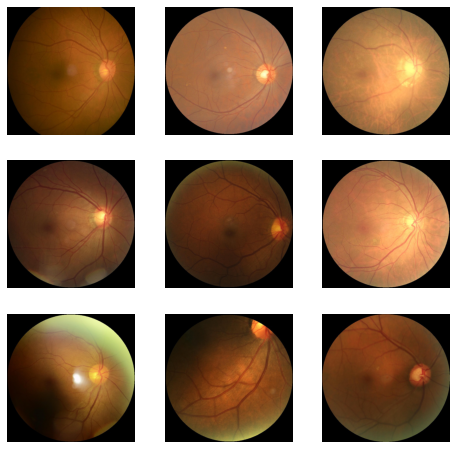

In [5]:
# sample plots for category: Normal (N)
sample_plotting("Normal", "N")

Sample of Diabetes (D) images:


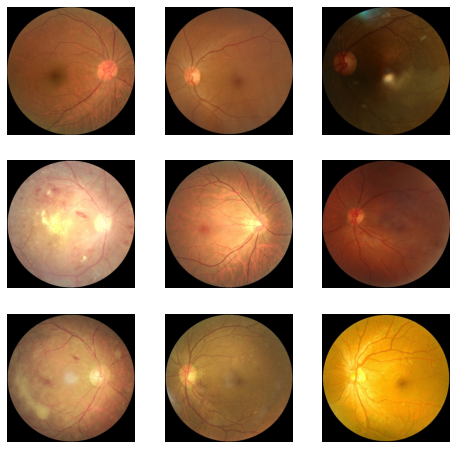

In [7]:
# sample plots for category: Diabetes (D)
sample_plotting("Diabetes", "D")

Sample of Other diseases/abnormalities (O) images:


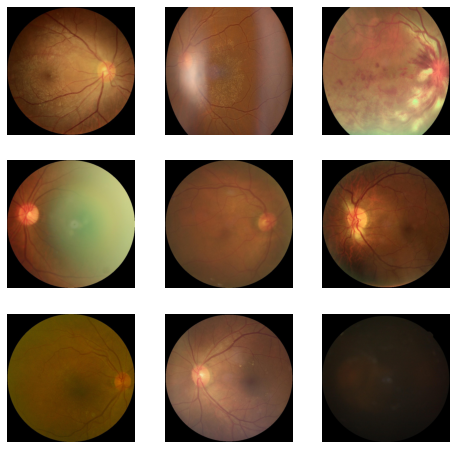

In [8]:
# sample plots for category: Other diseases/abnormalities (O)
sample_plotting("Other diseases/abnormalities", "O")

Sample of Cataract (C) images:


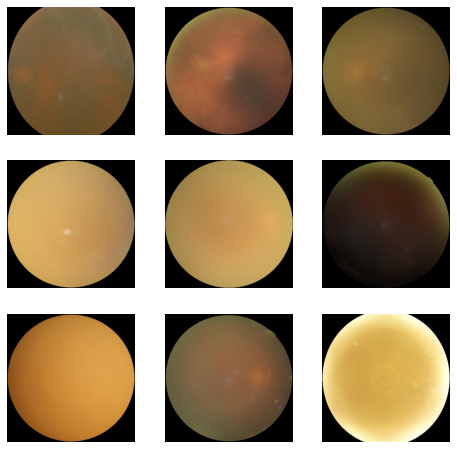

In [10]:
# sample plots for category: Cataract (C)
sample_plotting("Cataract", "C")

Sample of Glaucoma (G) images:


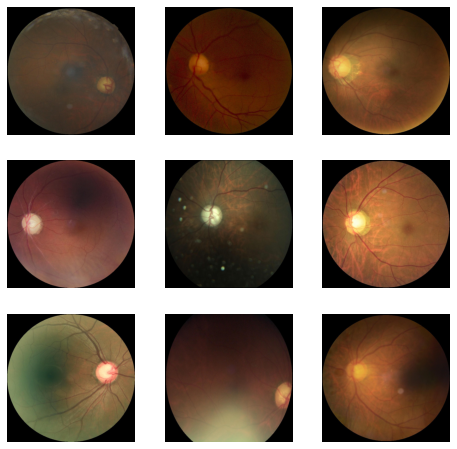

In [12]:
# sample plots for category: Glaucoma (G)
sample_plotting("Glaucoma", "G")

Sample of Age related Macular Degeneration (A) images:


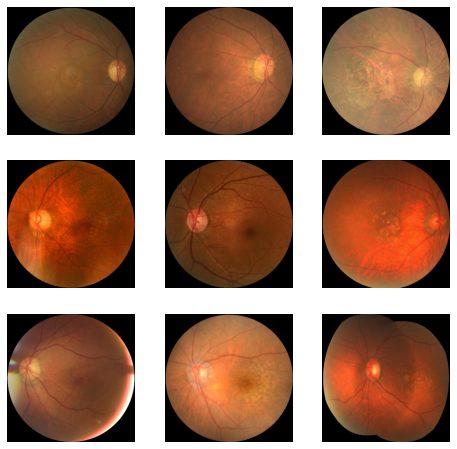

In [14]:
# sample plots for category: Age related Macular Degeneration (A)
sample_plotting("Age related Macular Degeneration", "A")

Sample of Pathological Myopia (M) images:


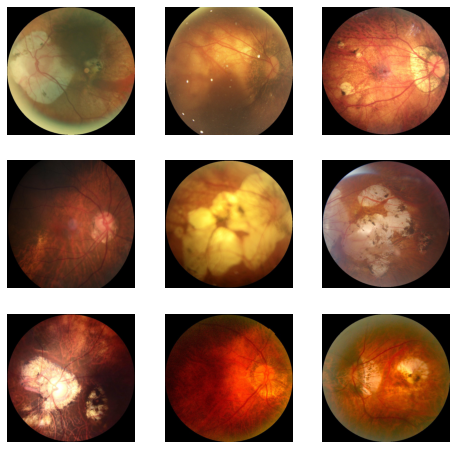

In [15]:
# sample plots for category: Pathological Myopia (M)
sample_plotting("Pathological Myopia", "M")

Sample of Hypertension (H) images:


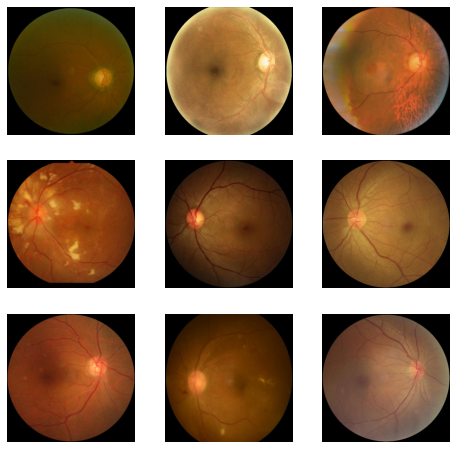

In [18]:
# sample plots for category: Hypertension (H)
sample_plotting("Hypertension", "H")